In [1]:
import pandas as pd
import numpy as np
from FML.Random.prep import FL
from FML.Random.db import db
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
trainfile = 'XGBoost_train.csv'
testfile = 'XGBoost_test.csv'
validfile = 'XGBoost_validation.csv'
data_prep = FL('abalone.data')
#data_prep.prep(0,trainfile, testfile, validfile)

In [2]:
data = db(trainfile,testfile,validfile,'Sex')

In [28]:
RFC = RandomForestClassifier(n_estimators=10, oob_score=True)
RFC.fit(data.train_x,data.train_y)
print('base error rate: {}'.format(1-RFC.score(data.train_x,data.train_y)))
print('test error rate: {}'.format(1-RFC.score(data.test_x,data.test_y)))
#even though the model is over fitting, the error rate remains at same level when estimators vary
to_plot = pd.Series(RFC.feature_importances_,data.test_x.columns)
to_plot=to_plot.sort_values(ascending = False)

base error rate: 0.01885662975157143
test error rate: 0.4832535885167464


In [4]:
to_plot.index

Index(['Whole weight', 'Shell weight', 'Viscera weight', 'Shucked weight',
       'Diameter', 'Height', 'Length', 'Rings'],
      dtype='object')

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

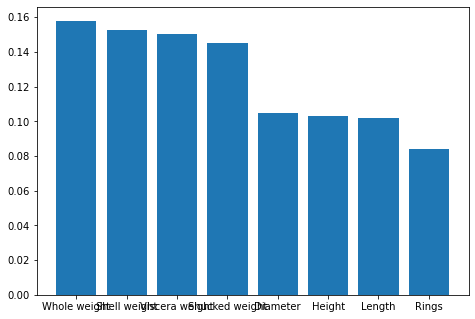

In [5]:
fig = plt.figure(0)
ax = fig.add_axes([0,0,1,1])
ax.bar(to_plot.index,to_plot.values)
fig.show